In [7]:
import numpy as np
import pandas as pd

data = pd.read_csv('order.csv')
t = data.iloc[:,6:]
t.head()

,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
0,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.0
1,15.87,75.80,6.22,2.12,0.00,0.00,0.0,0.0
2,16.88,56.75,3.37,16.48,6.53,0.00,0.0,0.0
3,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0
4,24.13,60.38,7.78,7.72,0.00,0.00,0.0,0.0


In [8]:
class KMeans:
    def __init__(self, k, times):
        self.k = k
        self.times = times
    def fit(self, X):
        X = np.asarray(X)
        # set seed
        np.random.seed(0)
        self.cluster_centers_ = X[np.random.randint(0,len(X), self.k)] # randomly select k center points
        self.labels_ = np.zeros(len(X))
        for t in range(self.times):
            for index, x in enumerate(X):
                # calculate distance between each point and the center
                distance = np.sqrt(np.sum((x - self.cluster_centers_)**2, axis = 1))
                # save the index of min distance to labels_
                self.labels_[index] = distance.argmin()
            for i in range(self.k):
                # change cluster center point
                self.cluster_centers_[i] = np.mean(X[self.labels_==i], axis=0)
    def predict(self, X):
        X = np.asarray(X)
        result = np.zeros(len(X))
        for index, x in enumerate(X):
            distance = np.sqrt(np.sum((x - self.cluster_centers_)**2, axis = 1))
            # find the cluster with min distance
            result[index] = distance.argmin()
        return result

In [9]:
kmeans = KMeans(3, 50)
kmeans.fit(t)

In [10]:
kmeans.cluster_centers_

array([[46.33977936,  8.93380516, 23.19047005, 13.11741633,  4.8107557 ,
         1.17283735,  1.35704647,  0.95392773],
       [19.5308009 , 50.42856608, 14.70652695,  7.89437019,  3.69829234,
         0.91000428,  1.92515077,  0.82113238],
       [ 7.93541008,  4.56182052, 30.65583437, 18.57726789,  8.61597195,
         1.28482514, 26.81950293,  1.30158264]])

In [12]:
# check sample in a given cluster
t[kmeans.labels_==0]

,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
15,48.23,20.37,15.38,8.29,7.73,0.0,0.0,0.0
23,24.10,22.29,38.69,14.92,0.00,0.0,0.0,0.0
24,36.51,31.93,27.18,4.38,0.00,0.0,0.0,0.0
40,22.76,0.00,0.00,77.24,0.00,0.0,0.0,0.0
43,65.64,12.36,21.99,0.00,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
29974,33.93,0.00,17.46,41.46,7.15,0.0,0.0,0.0
29977,45.10,0.00,26.68,28.22,0.00,0.0,0.0,0.0
29988,28.21,0.00,48.34,23.44,0.00,0.0,0.0,0.0
29989,61.32,0.00,23.34,15.34,0.00,0.0,0.0,0.0


In [13]:
kmeans.predict([[30,30,40,0,0,0,0,0],[0,0,0,0,0,30,30,40],[30,30,0,0,0,0,20,20]])

array([0., 2., 1.])

In [14]:
t2 = data.loc[:, "Food%":"Fresh%"] # slice by col name instead of index
kmeans = KMeans(3,50)
kmeans.fit(t2)

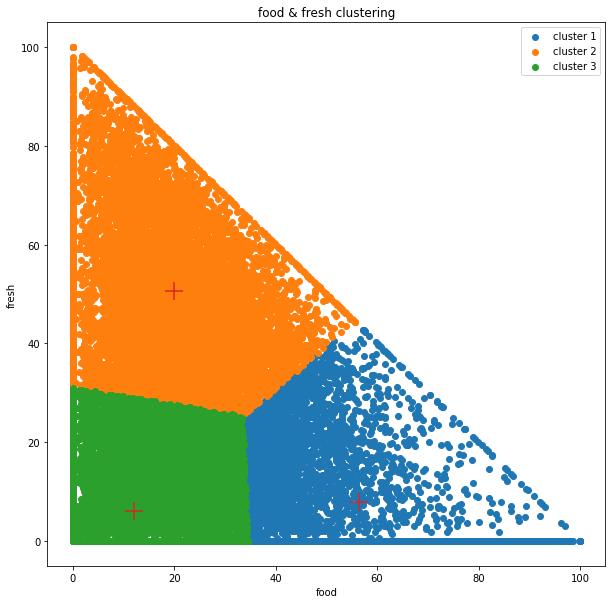

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(t2[kmeans.labels_==0].iloc[:, 0], t2[kmeans.labels_==0].iloc[:, 1], label='cluster 1')
plt.scatter(t2[kmeans.labels_==1].iloc[:, 0], t2[kmeans.labels_==1].iloc[:, 1], label='cluster 2')
plt.scatter(t2[kmeans.labels_==2].iloc[:, 0], t2[kmeans.labels_==2].iloc[:, 1], label='cluster 3')
# draw cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='+', s=300)
plt.title('food & fresh clustering')
plt.xlabel('food')
plt.ylabel('fresh')
plt.legend()
plt.show()